In [14]:
from matplotlib import pyplot as plt
from scipy.stats import multivariate_normal
import numpy as np
import random

In [15]:
# returns a dataPoint from 2d gauß with given mu and sigma
def random_gaussian_2d(mu, sigma):
    x = random.gauss(mu, sigma)
    y = random.gauss(mu, sigma)
    return (x, y)

# returns p(x; mu, sig)
def calc_gaussian_2d(x, mu, sig):
    return multivariate_normal.pdf(x, mu, sig)   

def calc_sig(mu, w):
    sig = 0
    for i, dataPoint in enumerate(dataPoints_all):
        sig += w[i] * ((dataPoint - mu)*(dataPoint - mu).T) / sum(w)
    return sig

def calc_b(x):
    b = 0
    b += calc_gaussian_2d(x, mu_1, sig_1) * phi_1 
    b += calc_gaussian_2d(x, mu_2, sig_2) * phi_2 
    b += calc_gaussian_2d(x, mu_3, sig_3) * phi_3 
    return b

def calc_bayes_rule(x, phi, mu, sigma):
    return (calc_gaussian_2d(x, mu, sigma) * phi) / calc_b(x)
    
def classify(x):
    a = calc_bayes_rule(x, phi_1, mu_1, sig_1)
    b = calc_bayes_rule(x, phi_2, mu_2, sig_2)
    c = calc_bayes_rule(x, phi_3, mu_3, sig_3)
    max_p = max(a, b, c)
    
    if (max_p == a):
        return 'red'
    if (max_p == b):
        return 'blue'
    if (max_p == c):
        return 'green'

In [16]:
# definde gaussian 1
dataPoints_1 = []
mu_1 = 0
sig_1 = 1

# define gaussian 2
dataPoints_2 = []
mu_2 = -2
sig_2 = 0.5

# define gaussian 3
dataPoints_3 = []
mu_3 = 2
sig_3 = 1.5

# create dataPoints arrays for all three gaussians
for i in range(100):
    dataPoints_1.append(random_gaussian_2d(mu_1, sig_1))
    dataPoints_2.append(random_gaussian_2d(mu_2, sig_2))
    dataPoints_3.append(random_gaussian_2d(mu_3, sig_3))
    
dataPoints_1 = np.array(dataPoints_1)
dataPoints_2 = np.array(dataPoints_2)
dataPoints_3 = np.array(dataPoints_3)
dataPoints_all = np.concatenate((dataPoints_1, dataPoints_2, dataPoints_3))

In [17]:
# initialize w_i[:] uniformly and initialize phi_i
w_1 = np.full(300, 1/3)
w_2 = np.full(300, 1/3)
w_3 = np.full(300, 1/3)

phi_1 = 1/len(dataPoints_all) * sum(w_1)
phi_2 = 1/len(dataPoints_all) * sum(w_2)
phi_3 = 1/len(dataPoints_all) * sum(w_3)

# choose random values for mu_i
random_indices = np.random.choice(300, 3, replace=False)
mu_1 = dataPoints_all[random_indices[0]]
mu_2 = dataPoints_all[random_indices[1]]
mu_3 = dataPoints_all[random_indices[2]]

sig_1 = calc_sig(mu_1, w_1)
sig_2 = calc_sig(mu_2, w_2)
sig_3 = calc_sig(mu_3, w_3)

# repeat steps until convergence
for i in range(100):
    # E-step  
    for i, dataPoint in enumerate(dataPoints_all):
        w_1[i] = calc_bayes_rule(dataPoint, phi_1, mu_1, sig_1)
        w_2[i] = calc_bayes_rule(dataPoint, phi_2, mu_2, sig_2)
        w_3[i] = calc_bayes_rule(dataPoint, phi_3, mu_3, sig_3)
                
    # M-step
    phi_1 = 1/len(dataPoints_all) * sum(w_1)
    phi_2 = 1/len(dataPoints_all) * sum(w_2)
    phi_3 = 1/len(dataPoints_all) * sum(w_3)

    mu_1 = np.dot(w_1, dataPoints_all) / sum(w_1)
    mu_2 = np.dot(w_2, dataPoints_all) / sum(w_2)
    mu_3 = np.dot(w_3, dataPoints_all) / sum(w_3)
    
    sig_1 = calc_sig(mu_1, w_1)
    sig_2 = calc_sig(mu_2, w_2)
    sig_3 = calc_sig(mu_3, w_3)

final mu_1: [-1.8881401  -1.99642659]
final mu_2: [2.18673605 1.75354421]
final mu_3: [ 0.02291853 -0.06397556]

initial mu: [2, 0, -2]


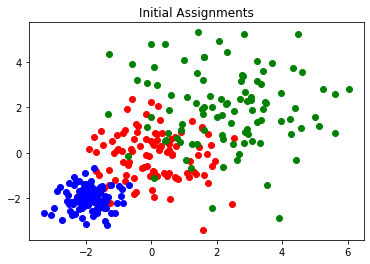

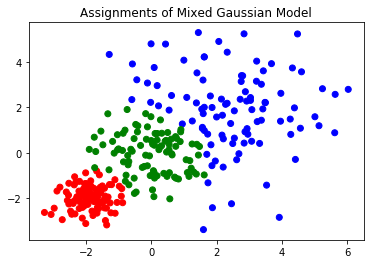

In [52]:
# test
colors_mgm = []

print('final mu_1: ' + str(mu_1))
print('final mu_2: ' + str(mu_2))
print('final mu_3: ' + str(mu_3))
print('')
print('initial mu: [2, 0, -2]')

for dataPoint in dataPoints_all:
    colors_mgm.append(classify(dataPoint))

colors_mgm = np.array(colors_mgm)  

plt.title('Initial Assignments')
plt.plot(dataPoints_1[:,0], dataPoints_1[:,1], 'o', color='red')
plt.plot(dataPoints_2[:,0], dataPoints_2[:,1], 'o', color='blue')
plt.plot(dataPoints_3[:,0], dataPoints_3[:,1], 'o', color='green')
plt.show()

plt.title('Assignments of Mixed Gaussian Model')
plt.scatter(dataPoints_all[:,0], dataPoints_all[:,1], color=colors_mgm)
plt.show()

In [61]:
# implement k-mean
# initialize centroids
random_indices = np.random.choice(300, 3, replace=False)
centroid_1 = dataPoints_all[random_indices[0]]
centroid_2 = dataPoints_all[random_indices[1]]
centroid_3 = dataPoints_all[random_indices[2]]

for i in range(100):
    centroid_1_dataPoints = []
    centroid_2_dataPoints = []
    centroid_3_dataPoints = []
    
    # assign dataPoints to centroids
    for dataPoint in dataPoints_all:  
        d_centroid_1 = np.sqrt((centroid_1[0] - dataPoint[0])**2 + (centroid_1[1] - dataPoint[1])**2)
        d_centroid_2 = np.sqrt((centroid_2[0] - dataPoint[0])**2 + (centroid_2[1] - dataPoint[1])**2)
        d_centroid_3 = np.sqrt((centroid_3[0] - dataPoint[0])**2 + (centroid_3[1] - dataPoint[1])**2)

        if (d_centroid_1 < d_centroid_2 and d_centroid_1 < d_centroid_3):
            centroid_1_dataPoints.append(dataPoint)

        if (d_centroid_2 < d_centroid_1 and d_centroid_2 < d_centroid_3):
            centroid_2_dataPoints.append(dataPoint)

        if (d_centroid_3 < d_centroid_2 and d_centroid_3 < d_centroid_1):
            centroid_3_dataPoints.append(dataPoint)

    # calc new centroids
    centroid_1 = sum(centroid_1_dataPoints) / len(centroid_1_dataPoints)
    centroid_2 = sum(centroid_2_dataPoints) / len(centroid_2_dataPoints)
    centroid_3 = sum(centroid_3_dataPoints) / len(centroid_3_dataPoints)

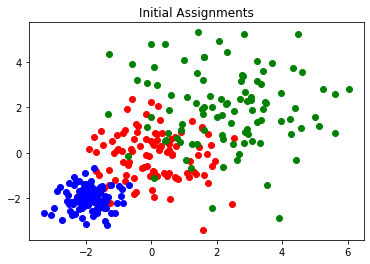

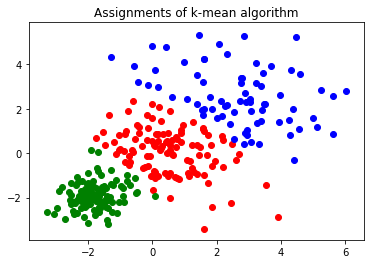

In [63]:
# plot results
plt.title('Initial Assignments')
plt.plot(dataPoints_1[:,0], dataPoints_1[:,1], 'o', color='red')
plt.plot(dataPoints_2[:,0], dataPoints_2[:,1], 'o', color='blue')
plt.plot(dataPoints_3[:,0], dataPoints_3[:,1], 'o', color='green')
plt.show()

colors_k_mean = []
for dataPoint in centroid_1_dataPoints:
    plt.scatter(dataPoint[0], dataPoint[1], color='red')

for dataPoint in centroid_2_dataPoints:
    plt.scatter(dataPoint[0], dataPoint[1], color='blue')

for dataPoint in centroid_3_dataPoints:
    plt.scatter(dataPoint[0], dataPoint[1], color='green')

plt.title('Assignments of k-mean algorithm')
plt.show()